In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
c = calendar.Calendar(firstweekday=calendar.SUNDAY)
import warnings

from tqdm import tqdm
from dateutil import relativedelta
warnings.filterwarnings('ignore')

In [15]:
# def next_opt_exp(today):

#     year = today.year
#     month = today.month
#     monthcal = c.monthdatescalendar(year,month)
#     second_thursday = [day for week in monthcal for day in week if \
#                 day.weekday() == calendar.THURSDAY and \
#                 day.month == month][1]

#     if today.day<second_thursday.day:
#         result= second_thursday
#     else:
#         result=second_thursday+ relativedelta.relativedelta(months=1)

#     return result.strftime("%Y%m")

# def option_generator(file_name_csv):
#     df=pd.read_csv(file_name_csv,header=None)

#     ### row dataframe column이름 붙이기

#     df.columns=['일자','정규시간외구분코드','종목코드','종목인덱스','체결가격','체결수량','체결유형코드',\
#                 '체결일자','체결시각','근월물체결가격','원월물체결가격',\
#                 '시가','고가','저가','직전가격','누적체결수량','누적거래대금','최종매도매수구분코드',\
#                     'LP보유수량','데이터구분','메세지일련번호','보드ID','세션ID','실시간상한가','실시간하한가']

#     ### 필요한 column 추출
#     df=df.drop(['정규시간외구분코드','체결유형코드','시가','고가','저가','근월물체결가격',\
#             '원월물체결가격','메세지일련번호','보드ID','세션ID','실시간상한가','실시간하한가','LP보유수량'],axis=1)


#     ### 옵션종류, 만기년도, 월 
#     code_dict = {'2': 'C', '3': 'P'}
#     exp_year_map = {'K': 2015,'L': 2016,'M': 2017,'N': 2018,'P': 2019,'Q': 2020,'R':\
#                     2021,'S': 2022,'T': 2023,'V': 2024,'W': 2025,'6': 2026,'7': 2027,}

#     month_map = {'1': '01','2': '02','3': '03','4': '04','5': '05','6': '06'\
#                 ,'7': '07','8': '08','9': '09','A': '10','B': '11','C': '12',}


#     df['만기'] = df.iloc[:,1].str[6:8].apply(lambda x: str(exp_year_map[x[0]]) + month_map[x[1]])
#     df['행사가']=df['종목코드'].str[8:]
#     df['종류'] = df['종목코드'].str[3].map(code_dict)
#     df['일자'] = pd.to_datetime(df['일자'], format='%Y%m%d')


#     ### 최근월물 계산
#     exp=[]
#     for i in tqdm(df['일자']):
        

#         exp.append(next_opt_exp(i))

#     df['최근월물']=exp

#     return df

In [16]:
# df=option_generator("./Data/DOKNXTRDSHRTH_2020_Q4.csv")
# df

In [2]:
df = pd.read_feather('./Data/20204Q.feather')
df[['체결가격', '행사가']] = df[['체결가격', '행사가']].astype(float)
df[['종목인덱스', '체결수량', '누적거래대금']] = df[['종목인덱스', '체결수량', '누적거래대금']].astype(int)

df['행사가'] = df['행사가'].apply(lambda x : x/10)
df['시간'] = (df.체결일자.astype(str) + df.체결시각.astype(str)).apply(lambda x : dt.datetime.strptime(x, '%Y%m%d%H%M%S%f'))
df.index = df['시간']

del df['종목인덱스']
del df['시간']
del df['일자']
del df['체결일자']
del df['체결시각']



In [3]:
df.reset_index().set_index(['시간', '행사가'])

종목코드   체결가격  체결수량  직전가격  누적체결수량  \
시간                      행사가                                              
2020-10-05 09:00:00.000 305.5  KR4201QA3055   6.59    23  0.00      23   
                        312.1  KR4201QA3121   2.08   197  0.00     197   
                        325.3  KR4201QA3253   0.07   406  0.00     406   
2020-10-05 09:00:00.230 300.6  KR4201QA3006  11.15     1  0.00       1   
2020-10-05 09:00:00.231 312.1  KR4201QA3121   2.04     1  2.08     208   
...                                     ...    ...   ...   ...     ...   
2020-12-30 15:23:52.653 350.0  KR4301R13500   0.27     4  0.28   60138   
                        352.6  KR4301R13526   0.32     3  0.33   53048   
2020-12-30 15:23:52.929 350.0  KR4301R13500   0.27     1  0.28   60139   
2020-12-30 15:23:53.626 372.4  KR4301R13724   1.43     1  1.44   55029   
2020-12-30 15:24:02.507 352.6  KR4301R13526   0.32    10  0.33   53058   

                                    누적거래대금  최종매도매수구분코드  데이터구분      만기 종류  \
시간                      행사가                                                
2020-10-05 09:00:00.000 305.5     37892500         NaN      1  202010  C   
                        312.1    102440000         NaN      1  202010  C   
                        325.3      7105000         NaN      1  202010  C   
2020-10-05 09:00:00.230 300.6      2787500         1.0      1  202010  C   
2020-10-05 09:00:00.231 312.1    108050000         1.0      1  202010  C   
...                                    ...         ...    ...     ... ..   
2020-12-30 15:23:52.653 350.0   5733060000         2.0      2  202101  P   
                        352.6   6191242500         1.0      2  202101  P   
2020-12-30 15:23:52.929 350.0   5733127500         1.0      2  202101  P   
2020-12-30 15:23:53.626 372.4  27398505000         1.0      2  202101  P   
2020-12-30 15:24:02.507 352.6   6192042500         1.0      2  202101  P   

                                 최근월물  
시간                      행사가            
2020-10-05 09:00:00.000 305.5  202010  
                        312.1  202010  
                        325.3  202010  
2020-10-05 09:00:00.230 300.6  202010  
2020-10-05 09:00:00.231 312.1  202010  
...                               ...  
2020-12-30 15:23:52.653 350.0  202101  
                        352.6  202101  
2020-12-30 15:23:52.929 350.0  202101  
2020-12-30 15:23:53.626 372.4  202101  
2020-12-30 15:24:02.507 352.6  202101  

[24582837 rows x 11 columns]

In [4]:
test = df.loc['2020-11-20':'2020-12-04']
test = test[test.종류 == 'P']

test


,종목코드,체결가격,체결수량,직전가격,누적체결수량,누적거래대금,최종매도매수구분코드,데이터구분,만기,행사가,종류,최근월물
시간,,,,,,,,,,,,
2020-11-20 09:00:00.000,KR4301QC2476,0.01,8,0.00,8,20000,NaN,1,202012,247.6,P,202012
2020-11-20 09:00:00.000,KR4301QC2500,0.02,4,0.00,4,20000,NaN,1,202012,250.0,P,202012
2020-11-20 09:00:00.000,KR4301QC2757,0.06,74,0.00,74,1110000,NaN,1,202012,275.7,P,202012
2020-11-20 09:00:00.000,KR4301QC2872,0.12,11,0.00,11,330000,NaN,1,202012,287.2,P,202012
2020-11-20 09:00:00.000,KR4301QC3052,0.37,12,0.00,12,1110000,NaN,1,202012,305.2,P,202012
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04 15:32:12.874,KR4301QC3359,0.04,2,0.05,52264,945252500,1.0,2,202012,335.9,P,202012
2020-12-04 15:32:13.043,KR4301QC3508,0.26,4,0.27,152796,13037382500,2.0,2,202012,350.8,P,202012
2020-12-04 15:32:14.011,KR4301QC3508,0.26,6,0.27,152802,13037772500,2.0,2,202012,350.8,P,202012


In [5]:
test.reset_index().set_index(['행사가', '체결가격'])

시간          종목코드  체결수량  직전가격  누적체결수량  \
행사가   체결가격                                                             
247.6 0.01 2020-11-20 09:00:00.000  KR4301QC2476     8  0.00       8   
250.0 0.02 2020-11-20 09:00:00.000  KR4301QC2500     4  0.00       4   
275.7 0.06 2020-11-20 09:00:00.000  KR4301QC2757    74  0.00      74   
287.2 0.12 2020-11-20 09:00:00.000  KR4301QC2872    11  0.00      11   
305.2 0.37 2020-11-20 09:00:00.000  KR4301QC3052    12  0.00      12   
...                            ...           ...   ...   ...     ...   
335.9 0.04 2020-12-04 15:32:12.874  KR4301QC3359     2  0.05   52264   
350.8 0.26 2020-12-04 15:32:13.043  KR4301QC3508     4  0.27  152796   
      0.26 2020-12-04 15:32:14.011  KR4301QC3508     6  0.27  152802   
360.7 1.09 2020-12-04 15:32:14.254  KR4301QC3607     3  1.11  198468   
      1.09 2020-12-04 15:32:16.839  KR4301QC3607    15  1.11  198483   

                 누적거래대금  최종매도매수구분코드  데이터구분      만기 종류    최근월물  
행사가   체결가격                                                     
247.6 0.01        20000         NaN      1  202012  P  202012  
250.0 0.02        20000         NaN      1  202012  P  202012  
275.7 0.06      1110000         NaN      1  202012  P  202012  
287.2 0.12       330000         NaN      1  202012  P  202012  
305.2 0.37      1110000         NaN      1  202012  P  202012  
...                 ...         ...    ...     ... ..     ...  
335.9 0.04    945252500         1.0      2  202012  P  202012  
350.8 0.26  13037382500         2.0      2  202012  P  202012  
      0.26  13037772500         2.0      2  202012  P  202012  
360.7 1.09  64026000000         1.0      2  202012  P  202012  
      1.09  64030087500         1.0      2  202012  P  202012  

[1929080 rows x 11 columns]

In [6]:
aa = test[['체결가격', '행사가']].reset_index()
aa

,시간,체결가격,행사가
0,2020-11-20 09:00:00.000,0.01,247.6
1,2020-11-20 09:00:00.000,0.02,250.0
2,2020-11-20 09:00:00.000,0.06,275.7
3,2020-11-20 09:00:00.000,0.12,287.2
4,2020-11-20 09:00:00.000,0.37,305.2
...,...,...,...
1929075,2020-12-04 15:32:12.874,0.04,335.9
1929076,2020-12-04 15:32:13.043,0.26,350.8
1929077,2020-12-04 15:32:14.011,0.26,350.8
1929078,2020-12-04 15:32:14.254,1.09,360.7


In [7]:
bb = aa.drop_duplicates(subset=['시간'], keep='last')
cc = bb.pivot(index='시간', columns='행사가', values='체결가격')

In [268]:
cc

행사가,140.0,140.1,140.2,140.3,142.9,145.2,145.9,147.8,150.1,150.2,...,382.1,385.6,387.0,387.2,390.4,392.0,400.0,400.1,410.9,415.6
시간,,,,,,,,,,,,,,,,,,,,,
2020-11-20 07:30:02.205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20 07:30:02.224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20 07:30:02.245,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20 07:30:02.775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-11-20 07:30:03.283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-01 15:34:59.546,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01 15:34:59.550,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-01 15:34:59.764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
cc = cc.loc['2020-11-30 12:00:00':].fillna(method='ffill').loc['2020-12-01 10:00:00':]

cc

행사가,140.0,140.1,140.2,140.3,142.9,145.2,145.9,147.8,150.1,150.2,...,392.0,395.5,397.9,400.0,400.1,400.8,402.7,410.9,415.6,420.8
시간,,,,,,,,,,,,,,,,,,,,,
2020-12-01 10:00:00.045,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.064,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.066,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.080,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.130,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04 15:34:59.658,0.10,1.14,0.43,0.02,0.02,0.02,0.12,0.02,0.49,0.02,...,47.0,40.35,43.4,56.85,39.4,59.0,33.15,57.5,73.5,69.9
2020-12-04 15:34:59.663,0.10,1.14,0.43,0.02,0.02,0.02,0.12,0.02,0.49,0.02,...,47.0,40.35,43.4,56.85,39.4,59.0,33.15,57.5,73.5,69.9
2020-12-04 15:34:59.683,0.10,1.14,0.43,0.02,0.02,0.02,0.12,0.02,0.49,0.02,...,47.0,40.35,43.4,56.85,39.4,59.0,33.15,57.5,73.5,69.9


In [200]:
# bb = aa.drop_duplicates(subset=['시간'], keep='last')
# cc = bb.pivot(index='시간', columns='행사가', values='체결가격')
# #cc = cc.fillna(method='ffill')

# cc

In [9]:
import yfinance as yf

bm = yf.download('^KS200')['Close']

[*********************100%***********************]  1 of 1 completed


In [10]:
bm

Date
1996-03-20     98.209999
1996-03-21     97.919998
1996-03-22     98.279999
1996-03-25     97.089996
1996-03-26     96.669998
                 ...    
2023-05-08    328.899994
2023-05-09    328.220001
2023-05-10    326.040009
2023-05-11    325.279999
2023-05-12    324.140015
Name: Close, Length: 6647, dtype: float64

In [11]:
bm.loc['2020-11-30'], bm.loc['2020-12-01']

(346.04998779296875, 352.3999938964844)

In [12]:
otm = bm.loc['2020-12-01'] * 0.95
atm = bm.loc['2020-12-01'] * 0.99

atm

348.87599395751954

In [285]:
cc

행사가,140.0,140.1,140.2,140.3,142.9,145.2,145.9,147.8,150.1,150.2,...,390.4,392.0,395.5,397.9,400.0,400.1,400.8,410.9,415.6,420.8
시간,,,,,,,,,,,,,,,,,,,,,
2020-12-01 10:00:00.045,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.064,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.066,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.080,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
2020-12-01 10:00:00.130,0.13,NaN,0.43,0.02,0.03,0.03,NaN,0.03,NaN,0.03,...,NaN,50.0,NaN,NaN,NaN,NaN,NaN,NaN,73.5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-03 16:34:59.448,0.11,NaN,0.42,0.01,0.02,0.02,0.12,0.02,0.53,0.02,...,29.25,47.0,40.35,43.4,56.85,39.25,59.0,63.0,73.5,69.9
2020-12-03 16:34:59.450,0.11,NaN,0.42,0.01,0.02,0.02,0.12,0.02,0.53,0.02,...,29.25,47.0,40.35,43.4,56.85,39.25,59.0,63.0,73.5,69.9
2020-12-03 16:34:59.454,0.11,NaN,0.42,0.01,0.02,0.02,0.12,0.02,0.53,0.02,...,29.25,47.0,40.35,43.4,56.85,39.25,59.0,63.0,73.5,69.9


In [13]:
dd = cc.T.loc[otm:atm].T

In [14]:
dd

행사가,335.0,335.1,335.6,335.9,337.5,337.6,337.7,340.0,340.1,340.6,...,340.9,342.5,342.6,342.7,345.0,345.8,345.9,347.4,347.5,347.6
시간,,,,,,,,,,,,,,,,,,,,,
2020-12-01 10:00:00.045,7.8,4.60,NaN,0.71,0.92,8.74,6.52,9.53,6.1,NaN,...,1.21,1.6,9.69,8.41,8.0,2.12,NaN,2.85,NaN,11.15
2020-12-01 10:00:00.064,7.8,4.60,NaN,0.71,0.92,8.74,6.52,9.53,6.1,NaN,...,1.20,1.6,9.69,8.41,8.0,2.12,NaN,2.85,NaN,11.15
2020-12-01 10:00:00.066,7.8,4.60,NaN,0.71,0.92,8.74,6.52,9.53,6.1,NaN,...,1.20,1.6,9.69,8.41,8.0,2.12,NaN,2.85,NaN,11.15
2020-12-01 10:00:00.080,7.8,4.60,NaN,0.71,0.92,8.74,6.52,9.53,6.1,NaN,...,1.20,1.6,9.69,8.41,8.0,2.12,NaN,2.85,NaN,11.15
2020-12-01 10:00:00.130,7.8,4.60,NaN,0.71,0.92,8.74,6.52,9.53,6.1,NaN,...,1.19,1.6,9.69,8.41,8.0,2.12,NaN,2.85,NaN,11.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04 15:34:59.658,4.7,1.83,10.1,0.04,0.06,4.08,2.10,4.42,2.4,11.5,...,0.07,0.1,6.57,2.80,3.2,0.13,5.55,0.18,8.18,3.76
2020-12-04 15:34:59.663,4.7,1.83,10.1,0.04,0.06,4.08,2.10,4.42,2.4,11.5,...,0.07,0.1,6.57,2.80,3.2,0.13,5.55,0.17,8.18,3.76
2020-12-04 15:34:59.683,4.7,1.83,10.1,0.04,0.06,4.08,2.10,4.42,2.4,11.5,...,0.07,0.1,6.57,2.80,3.2,0.13,5.55,0.17,8.18,3.76


In [15]:
dd = dd.dropna(axis=1)
dd = dd.dropna(axis=0)
dd

행사가,335.0,335.1,335.9,337.5,337.6,337.7,340.0,340.1,340.9,342.5,342.6,342.7,345.0,345.8,347.4,347.6
시간,,,,,,,,,,,,,,,,
2020-12-01 10:00:00.045,7.8,4.60,0.71,0.92,8.74,6.52,9.53,6.1,1.21,1.6,9.69,8.41,8.0,2.12,2.85,11.15
2020-12-01 10:00:00.064,7.8,4.60,0.71,0.92,8.74,6.52,9.53,6.1,1.20,1.6,9.69,8.41,8.0,2.12,2.85,11.15
2020-12-01 10:00:00.066,7.8,4.60,0.71,0.92,8.74,6.52,9.53,6.1,1.20,1.6,9.69,8.41,8.0,2.12,2.85,11.15
2020-12-01 10:00:00.080,7.8,4.60,0.71,0.92,8.74,6.52,9.53,6.1,1.20,1.6,9.69,8.41,8.0,2.12,2.85,11.15
2020-12-01 10:00:00.130,7.8,4.60,0.71,0.92,8.74,6.52,9.53,6.1,1.19,1.6,9.69,8.41,8.0,2.12,2.85,11.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04 15:34:59.658,4.7,1.83,0.04,0.06,4.08,2.10,4.42,2.4,0.07,0.1,6.57,2.80,3.2,0.13,0.18,3.76
2020-12-04 15:34:59.663,4.7,1.83,0.04,0.06,4.08,2.10,4.42,2.4,0.07,0.1,6.57,2.80,3.2,0.13,0.17,3.76
2020-12-04 15:34:59.683,4.7,1.83,0.04,0.06,4.08,2.10,4.42,2.4,0.07,0.1,6.57,2.80,3.2,0.13,0.17,3.76


In [16]:
def cal_cost(df):
    return df.iloc[0].item() + df.iloc[2].item() - 2 * df.iloc[1].item()

In [17]:
from numpy.lib.stride_tricks import sliding_window_view

In [18]:
reg = pd.DataFrame()
kk = dd.resample('30T').last()
for x in kk.index:
    g_reg = []
    for y in sliding_window_view(dd.columns, 3):
        g_reg.append(cal_cost(kk.loc[x,:].loc[y]))
    reg.loc[x, list(sliding_window_view(dd.columns, 3)[:,0])] = g_reg

In [20]:
reg.loc[:'2020-12-04']

,335.0,335.1,335.9,337.5,337.6,337.7,340.0,340.1,340.9,342.5,342.6,342.7,345.0,345.8
2020-12-01 10:00:00,-0.73,4.13,7.55,-10.00,5.23,-6.24,-1.81,5.45,7.61,-10.46,3.39,-6.91,6.71,7.41
2020-12-01 10:30:00,-0.66,4.09,7.54,-11.01,7.27,-7.24,-1.82,5.46,7.54,-10.41,3.23,-6.54,6.53,7.30
2020-12-01 11:00:00,-0.99,4.25,7.53,-11.00,7.27,-7.19,-1.91,5.52,7.49,-10.34,3.59,-7.32,6.92,5.64
2020-12-01 11:30:00,-1.01,4.27,7.51,-10.67,6.63,-6.94,-1.75,5.43,7.47,-10.32,3.69,-7.50,7.00,5.57
2020-12-01 12:00:00,-0.53,4.05,7.67,-11.46,7.95,-7.95,-1.22,5.19,7.76,-10.96,3.96,-7.11,6.66,5.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-04 13:30:00,1.04,1.82,3.98,-5.95,4.20,-4.21,-0.36,2.35,6.41,-10.20,4.16,-3.44,3.08,3.44
2020-12-04 14:00:00,1.02,1.83,3.98,-5.98,4.30,-4.27,-0.42,2.40,6.41,-10.19,4.20,-3.56,3.17,3.51
2020-12-04 14:30:00,0.92,1.87,4.00,-5.92,4.16,-4.12,-0.59,2.49,6.42,-10.09,4.10,-3.69,3.29,3.57
2020-12-04 15:00:00,1.07,1.80,4.01,-5.97,4.24,-4.30,-0.32,2.35,6.45,-10.24,4.22,-3.56,3.16,3.52


<AxesSubplot:>

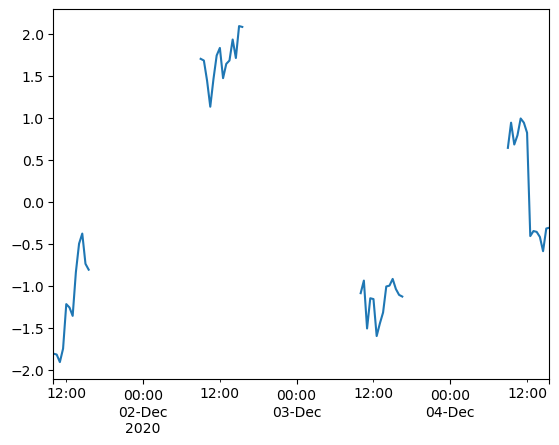

In [22]:
reg[340.0].plot()

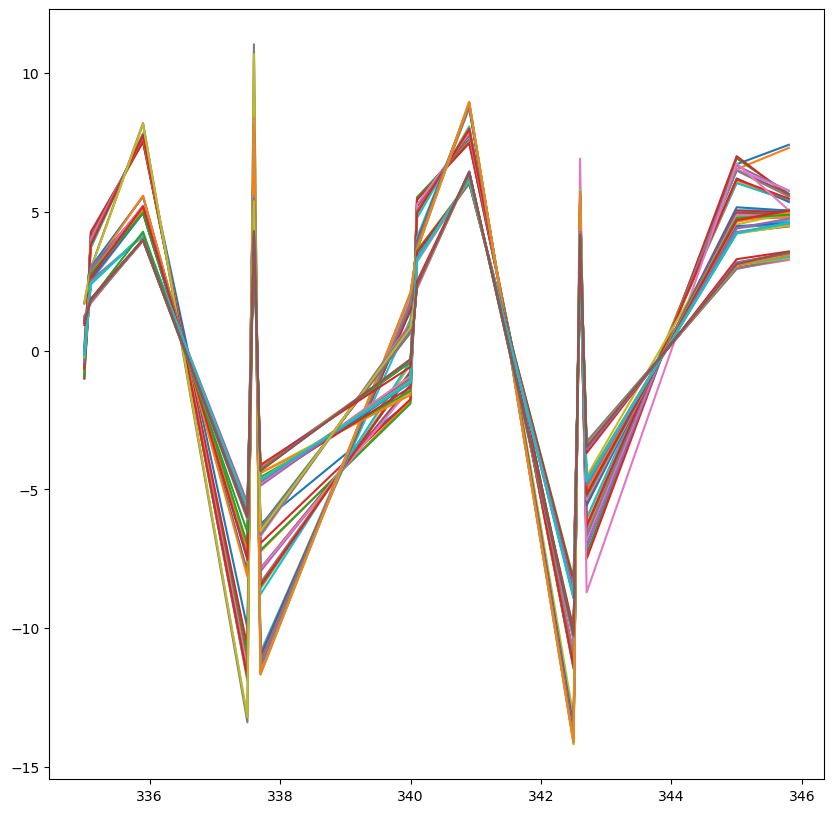

In [24]:
plt.figure(figsize=(10, 10))
plt.plot(reg.T)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


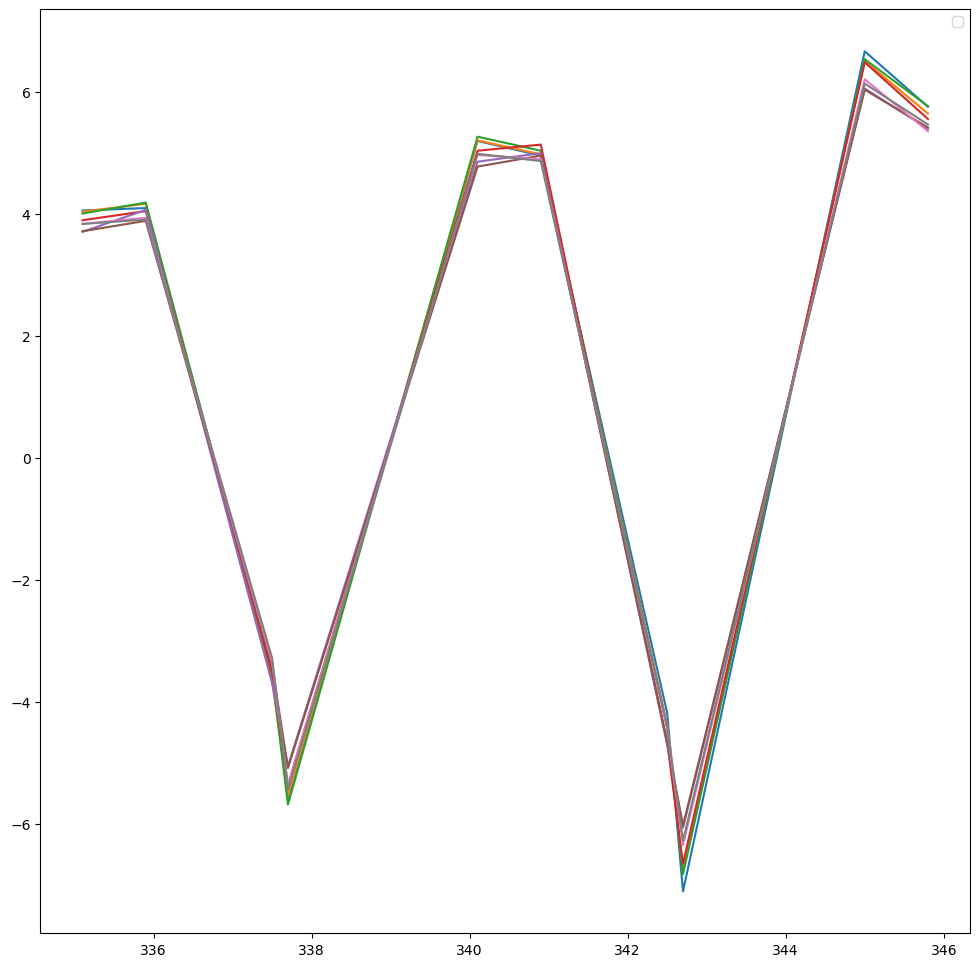

In [233]:
plt.figure(figsize=(12,12))
plt.plot(reg.T, label)
plt.legend()

In [172]:
atm

352.3999938964844

<AxesSubplot:>

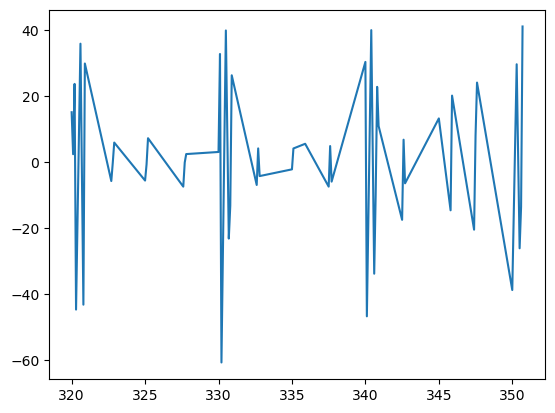

In [170]:
reg.iloc[0].plot()

In [134]:
dd.index[0], dd.index[-1]

(Timestamp('2020-11-26 14:51:34.705000'),
 Timestamp('2020-12-01 15:45:00.043000'))

In [99]:
dd = cc.dropna()
dd

행사가,140.0,140.1,140.2,140.3,142.9,145.2,147.8,150.1,150.2,152.8,...,342.7,345.0,345.9,360.8,360.9,362.5,370.4,380.3,380.4,400.1
시간,,,,,,,,,,,,,,,,,,,,,
2020-10-06 15:16:06.058,0.43,1.98,0.85,0.22,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
2020-10-06 15:16:06.240,0.43,1.98,0.85,0.22,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
2020-10-06 15:16:06.454,0.43,1.98,0.85,0.22,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
2020-10-06 15:16:06.891,0.43,1.98,0.85,0.22,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
2020-10-06 15:16:07.017,0.43,1.98,0.85,0.22,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-06 15:34:58.946,0.43,1.98,0.85,0.03,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
2020-10-06 15:34:59.550,0.43,1.98,0.85,0.03,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0
2020-10-06 15:42:41.265,0.43,1.98,0.85,0.03,0.03,0.03,0.03,1.05,0.04,0.03,...,28.3,30.85,30.1,46.0,45.75,48.05,75.9,81.8,77.5,85.0


In [ ]:
dd

In [52]:
aa.시간 = aa.시간.apply(lambda x : dt.datetime.strftime(x, '%H%M%S%f')) 

In [56]:
aa = aa.set_index('시간')
aa

,체결가격,행사가
시간,,
090200737000,1.65,305.4
090922162000,1.39,305.4
090923420000,4.33,312.0
090923420000,4.32,312.0
090924196000,4.32,312.0
...,...,...
151836892000,1.38,310.4
151837013000,1.39,310.4
151837471000,1.39,310.4


In [57]:
aa.pivot(index=aa.index, columns='체결가격'

KeyError: '090200737000'

In [42]:
aa.T

행사가,305.4,305.4,312.0,312.0,312.0,312.0,305.4,305.4,305.4,312.0,...,315.3,315.3,320.3,310.4,310.4,310.4,310.4,310.4,300.5,310.4
시간,2020-10-05 09:02:00.737000,2020-10-05 09:09:22.162000,2020-10-05 09:09:23.420000,2020-10-05 09:09:23.420000,2020-10-05 09:09:24.196000,2020-10-05 09:09:24.197000,2020-10-05 09:09:24.197000,2020-10-05 09:09:24.418000,2020-10-05 09:09:24.830000,2020-10-05 09:09:25.940000,...,2020-10-05 15:18:35.042000,2020-10-05 15:18:35.042000,2020-10-05 15:18:35.047000,2020-10-05 15:18:35.580000,2020-10-05 15:18:35.581000,2020-10-05 15:18:36.892000,2020-10-05 15:18:37.013000,2020-10-05 15:18:37.471000,2020-10-05 15:27:57.808000,2020-10-05 15:27:58.376000
체결가격,1.65,1.39,4.33,4.32,4.32,4.31,1.4,1.39,1.39,4.32,...,3.28,3.28,6.68,1.39,1.39,1.38,1.39,1.39,0.25,1.51


In [37]:
aa.reset_index().set_index(['행사가','체결가격']).T

행사가                    305.4                                           312.0  \
체결가격                    1.65                    1.39                    4.33   
시간   2020-10-05 09:02:00.737 2020-10-05 09:09:22.162 2020-10-05 09:09:23.420   

행사가                                                                           \
체결가격                    4.32                    4.32                    4.31   
시간   2020-10-05 09:09:23.420 2020-10-05 09:09:24.196 2020-10-05 09:09:24.197   

행사가                    305.4                                                  \
체결가격                    1.40                    1.39                    1.39   
시간   2020-10-05 09:09:24.197 2020-10-05 09:09:24.418 2020-10-05 09:09:24.830   

행사가                    312.0  ...                   315.3  \
체결가격                    4.32  ...                    3.28   
시간   2020-10-05 09:09:25.940  ... 2020-10-05 15:18:35.042   

행사가                                            320.3                   310.4  \
체결가격                    3.28                    6.68                    1.39   
시간   2020-10-05 15:18:35.042 2020-10-05 15:18:35.047 2020-10-05 15:18:35.580   

행사가                                                                           \
체결가격                    1.39                    1.38                    1.39   
시간   2020-10-05 15:18:35.581 2020-10-05 15:18:36.892 2020-10-05 15:18:37.013   

행사가                                            300.5                   310.4  
체결가격                    1.39                    0.25                    1.51  
시간   2020-10-05 15:18:37.471 2020-10-05 15:27:57.808 2020-10-05 15:27:58.376  

[1 rows x 185306 columns]

In [22]:
test.reset_index().set_index(['행사가', '체결가격'])

시간          종목코드  체결수량  직전가격  누적체결수량  \
행사가   체결가격                                                             
305.4 1.65 2020-10-05 09:02:00.737  KR4301QA3054     6  1.64    2941   
      1.39 2020-10-05 09:09:22.162  KR4301QA3054    14  1.40    9520   
312.0 4.33 2020-10-05 09:09:23.420  KR4301QA3120     1  4.34     824   
      4.32 2020-10-05 09:09:23.420  KR4301QA3120     2  4.33     826   
      4.32 2020-10-05 09:09:24.196  KR4301QA3120     1  4.31     829   
...                            ...           ...   ...   ...     ...   
310.4 1.38 2020-10-05 15:18:36.892  KR4301QA3104     1  1.39  101012   
      1.39 2020-10-05 15:18:37.013  KR4301QA3104     3  1.38  101015   
      1.39 2020-10-05 15:18:37.471  KR4301QA3104     3  1.38  101018   
300.5 0.25 2020-10-05 15:27:57.808  KR4301QA3005     5  0.24  163773   
310.4 1.51 2020-10-05 15:27:58.376  KR4301QA3104     1  1.52  104573   

                 누적거래대금  최종매도매수구분코드  데이터구분      만기 종류    최근월물  
행사가   체결가격                                                     
305.4 1.65   1125987500         1.0      1  202010  P  202010  
      1.39   3449845000         2.0      1  202010  P  202010  
312.0 4.33    901500000         1.0      1  202010  P  202010  
      4.32    903660000         1.0      1  202010  P  202010  
      4.32    906895000         1.0      1  202010  P  202010  
...                 ...         ...    ...     ... ..     ...  
310.4 1.38  44826872500         1.0      2  202010  P  202010  
      1.39  44827915000         2.0      2  202010  P  202010  
      1.39  44828957500         1.0      2  202010  P  202010  
300.5 0.25  14806750000         2.0      2  202010  P  202010  
310.4 1.51  46139332500         2.0      2  202010  P  202010  

[185306 rows x 11 columns]

In [11]:
test2 = test[(test.최종매도매수구분코드 == 1) & (test.종류 == 'P')]

In [14]:
test2

,종목코드,체결가격,체결수량,직전가격,누적체결수량,누적거래대금,최종매도매수구분코드,데이터구분,만기,행사가,종류,최근월물
시간,,,,,,,,,,,,
2020-10-05 09:02:00.737,KR4301QA3054,1.65,6,1.64,2941,1125987500,1.0,1,202010,305.4,P,202010
2020-10-05 09:09:23.420,KR4301QA3120,4.33,1,4.34,824,901500000,1.0,1,202010,312.0,P,202010
2020-10-05 09:09:23.420,KR4301QA3120,4.32,2,4.33,826,903660000,1.0,1,202010,312.0,P,202010
2020-10-05 09:09:24.196,KR4301QA3120,4.32,1,4.31,829,906895000,1.0,1,202010,312.0,P,202010
2020-10-05 09:09:24.197,KR4301QA3054,1.40,5,1.41,9566,3465950000,1.0,1,202010,305.4,P,202010
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05 15:18:31.778,KR4301QA3179,4.80,1,4.82,1847,2577077500,1.0,2,202010,317.9,P,202010
2020-10-05 15:18:33.012,KR4301QA3104,1.39,1,1.40,100996,44821315000,1.0,2,202010,310.4,P,202010
2020-10-05 15:18:35.580,KR4301QA3104,1.39,13,1.40,101009,44825832500,1.0,2,202010,310.4,P,202010


In [38]:
k_list = df.행사가
cp_list = df.종류
m_list = df.최근월물

In [42]:
aa = pd.concat([k_list, cp_list, m_list], keys=['행사가', '종류', '최근월물'])

In [43]:
pd.DataFrame(aa)

0
     시간                             
행사가  2020-10-05 09:00:00.000   305.5
     2020-10-05 09:00:00.000   312.1
     2020-10-05 09:00:00.000   325.3
     2020-10-05 09:00:00.230   300.6
     2020-10-05 09:00:00.231   312.1
...                              ...
최근월물 2020-12-30 15:23:52.653  202101
     2020-12-30 15:23:52.653  202101
     2020-12-30 15:23:52.929  202101
     2020-12-30 15:23:53.626  202101
     2020-12-30 15:24:02.507  202101

[73748511 rows x 1 columns]

In [35]:
df.종류

시간
2020-10-05 09:00:00.000    C
2020-10-05 09:00:00.000    C
2020-10-05 09:00:00.000    C
2020-10-05 09:00:00.230    C
2020-10-05 09:00:00.231    C
                          ..
2020-12-30 15:23:52.653    P
2020-12-30 15:23:52.653    P
2020-12-30 15:23:52.929    P
2020-12-30 15:23:53.626    P
2020-12-30 15:24:02.507    P
Name: 종류, Length: 24582837, dtype: object

In [36]:
df.최근월물

시간
2020-10-05 09:00:00.000    202010
2020-10-05 09:00:00.000    202010
2020-10-05 09:00:00.000    202010
2020-10-05 09:00:00.230    202010
2020-10-05 09:00:00.231    202010
                            ...  
2020-12-30 15:23:52.653    202101
2020-12-30 15:23:52.653    202101
2020-12-30 15:23:52.929    202101
2020-12-30 15:23:53.626    202101
2020-12-30 15:24:02.507    202101
Name: 최근월물, Length: 24582837, dtype: object

In [3]:
from pykrx import stock
kospi200 = stock.get_index_ohlcv("20200101", "20201231", '1028')
kospi200

코스피 200,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2020-01-02,294.19,294.57,289.96,290.35,66161346,3179607127060,1261453309933690
2020-01-03,293.10,294.88,289.04,290.74,79773386,3786974299485,1262242214935285
2020-01-06,287.73,289.41,287.49,288.43,69955469,3021821664326,1250784113174805
2020-01-07,290.01,292.26,289.64,291.23,65345566,3198886938282,1263417989590910
2020-01-08,288.94,291.01,287.30,289.42,124529390,5688121940953,1251655072925540
...,...,...,...,...,...,...,...
2020-12-23,367.02,371.93,364.72,371.32,296021598,14355360989450,1665117673533095
2020-12-24,371.67,380.29,371.67,379.18,314368585,14405605822470,1697501365510295
2020-12-28,381.51,383.84,378.44,379.93,304328626,18207122791866,1699961888272515


In [4]:
kospi200.loc['2020-10']

코스피 200,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2020-10-05,309.65,314.66,309.09,313.51,157986196,7120643481652,1389194561926965
2020-10-06,315.13,316.48,313.03,314.45,139894860,6411878183504,1393780357258315
2020-10-07,312.34,317.44,311.82,317.35,124429688,5273799827206,1406655023684895
2020-10-08,320.31,320.38,316.60,317.47,168692587,8471910138311,1408458232756110
2020-10-12,318.99,320.01,317.67,319.15,140937321,6923381907738,1415555215715070
2020-10-13,321.04,321.45,316.98,319.58,126741368,6568609540494,1416149972026240
2020-10-14,319.60,319.88,315.71,316.57,129341624,6719033619424,1402264590423070
2020-10-15,315.76,315.89,312.40,313.92,124410109,6366830510346,1390985779024215
2020-10-16,314.41,315.47,309.67,311.83,126440573,6249577959140,1382051659385290


In [8]:
df.index = df.시간

In [10]:
df

,일자,종목코드,종목인덱스,체결가격,체결수량,체결일자,체결시각,직전가격,누적체결수량,누적거래대금,최종매도매수구분코드,데이터구분,만기,행사가,종류,최근월물,시간
시간,,,,,,,,,,,,,,,,,
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3055,253,6.59,23,20201005,90000000,0.00,23,37892500,NaN,1,202010,305.5,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3121,256,2.08,197,20201005,90000000,0.00,197,102440000,NaN,1,202010,312.1,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3253,261,0.07,406,20201005,90000000,0.00,406,7105000,NaN,1,202010,325.3,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:00.230,2020-10-05,KR4201QA3006,251,11.15,1,20201005,90000230,0.00,1,2787500,1.0,1,202010,300.6,C,202010,2020-10-05 09:00:00.230
2020-10-05 09:00:00.231,2020-10-05,KR4201QA3121,256,2.04,1,20201005,90000231,2.08,208,108050000,1.0,1,202010,312.1,C,202010,2020-10-05 09:00:00.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-30 15:23:52.653,2020-12-30,KR4301R13500,1503,0.27,4,20201230,152352653,0.28,60138,5733060000,2.0,2,202101,350.0,P,202101,2020-12-30 15:23:52.653
2020-12-30 15:23:52.653,2020-12-30,KR4301R13526,1504,0.32,3,20201230,152352653,0.33,53048,6191242500,1.0,2,202101,352.6,P,202101,2020-12-30 15:23:52.653
2020-12-30 15:23:52.929,2020-12-30,KR4301R13500,1503,0.27,1,20201230,152352929,0.28,60139,5733127500,1.0,2,202101,350.0,P,202101,2020-12-30 15:23:52.929


In [12]:
aa = df.loc['2020-10-05']

In [17]:
aa

,일자,종목코드,종목인덱스,체결가격,체결수량,체결일자,체결시각,직전가격,누적체결수량,누적거래대금,최종매도매수구분코드,데이터구분,만기,행사가,종류,최근월물,시간
시간,,,,,,,,,,,,,,,,,
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3055,253,6.59,23,20201005,90000000,0.00,23,37892500,NaN,1,202010,305.5,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3121,256,2.08,197,20201005,90000000,0.00,197,102440000,NaN,1,202010,312.1,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3253,261,0.07,406,20201005,90000000,0.00,406,7105000,NaN,1,202010,325.3,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:00.230,2020-10-05,KR4201QA3006,251,11.15,1,20201005,90000230,0.00,1,2787500,1.0,1,202010,300.6,C,202010,2020-10-05 09:00:00.230
2020-10-05 09:00:00.231,2020-10-05,KR4201QA3121,256,2.04,1,20201005,90000231,2.08,208,108050000,1.0,1,202010,312.1,C,202010,2020-10-05 09:00:00.231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05 15:18:36.892,2020-10-05,KR4301QA3104,1323,1.38,1,20201005,151836892,1.39,101012,44826872500,1.0,2,202010,310.4,P,202010,2020-10-05 15:18:36.892
2020-10-05 15:18:37.013,2020-10-05,KR4301QA3104,1323,1.39,3,20201005,151837013,1.38,101015,44827915000,2.0,2,202010,310.4,P,202010,2020-10-05 15:18:37.013
2020-10-05 15:18:37.471,2020-10-05,KR4301QA3104,1323,1.39,3,20201005,151837471,1.38,101018,44828957500,1.0,2,202010,310.4,P,202010,2020-10-05 15:18:37.471


In [26]:
aa[aa['종목인덱스']==253]

,일자,종목코드,종목인덱스,체결가격,체결수량,체결일자,체결시각,직전가격,누적체결수량,누적거래대금,최종매도매수구분코드,데이터구분,만기,행사가,종류,최근월물,시간
시간,,,,,,,,,,,,,,,,,
2020-10-05 09:00:00.000,2020-10-05,KR4201QA3055,253,6.59,23,20201005,90000000,0.00,23,37892500,NaN,1,202010,305.5,C,202010,2020-10-05 09:00:00.000
2020-10-05 09:00:16.002,2020-10-05,KR4201QA3055,253,6.55,1,20201005,90016002,6.45,27,44395000,2.0,1,202010,305.5,C,202010,2020-10-05 09:00:16.002
2020-10-05 09:00:41.547,2020-10-05,KR4201QA3055,253,6.48,2,20201005,90041547,6.40,64,103462500,2.0,1,202010,305.5,C,202010,2020-10-05 09:00:41.547
2020-10-05 09:08:17.093,2020-10-05,KR4201QA3055,253,6.55,1,20201005,90817093,6.63,214,348395000,1.0,1,202010,305.5,C,202010,2020-10-05 09:08:17.093
2020-10-05 09:09:01.455,2020-10-05,KR4201QA3055,253,6.62,1,20201005,90901455,6.74,218,355055000,1.0,1,202010,305.5,C,202010,2020-10-05 09:09:01.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-05 15:25:59.715,2020-10-05,KR4201QA3055,253,9.10,1,20201005,152559715,9.06,2284,4421200000,2.0,2,202010,305.5,C,202010,2020-10-05 15:25:59.715
2020-10-05 15:26:22.437,2020-10-05,KR4201QA3055,253,9.10,1,20201005,152622437,9.09,2287,4428020000,2.0,2,202010,305.5,C,202010,2020-10-05 15:26:22.437
2020-10-05 15:26:30.037,2020-10-05,KR4201QA3055,253,9.07,1,20201005,152630037,9.10,2288,4430287500,1.0,2,202010,305.5,C,202010,2020-10-05 15:26:30.037


In [19]:
aa['행사가'].astype(str).describe()

count     443010
unique       257
top        315.4
freq       59544
Name: 행사가, dtype: object